In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [2]:
# 특정 어플리케이션에서 가장 적합한 데이터 표현을 찾는 과정 (특성 공학)
# 올바른 데이터의 표현은 지도 학습 모델에서 적절한 매개변수를 선택하는 것보다 성능에 큰 영향을 미침
data = pd.read_csv('./adult.data', header=None, names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income'])
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]
data
# 해당 데이터 셋에선 age, hours-per-week는 이전에 다룬 연속형 특성. 하지만, 해당 데이터셋에선 범주형 특성도 있음
# 이러한, 범주형 특성에 데이터는 다른 방식으로 표현해야함

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
5,37,Private,Masters,Female,40,Exec-managerial,<=50K
6,49,Private,9th,Female,16,Other-service,<=50K
7,52,Self-emp-not-inc,HS-grad,Male,45,Exec-managerial,>50K
8,31,Private,Masters,Female,50,Prof-specialty,>50K
9,42,Private,Bachelors,Male,40,Exec-managerial,>50K


In [3]:
# 1. 원-핫-인코딩(가변수)
# 이방법은 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것
# pandas에선 get_dummies 함수를 통해 쉽게 인코딩할 수 있음
print("original \n",list(data.columns))
data_dummies = pd.get_dummies(data)
print("after dummies \n", list(data_dummies.columns))
# 연속성 특성은 그대로지만, 범주형 특성들은 각 속성 값마다 feature를 생성함
# gender - Male, Female 등
data_dummies.head()

original 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']
after dummies 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Oth

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print(X.shape, y.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

(32561, 44) (32561,)
0.808500184253


In [6]:
# 2. 숫자로 표현된 범주형 특성
demo_df = pd.DataFrame({'number':[0,1,2,1], 'range':['양말','여우','양말','상자']})
display(demo_df)

,number,range
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [8]:
# 숫자 특성은 그대로, 범주형 특성은 원-핫-인코딩 결과
display(pd.get_dummies(demo_df))

,number,range_상자,range_양말,range_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [10]:
# 만약, 숫자 특성도 가변수로 만들고 싶다면 columns 매개변수에 인코딩하고 싶은 열을 명시함
demo_df['number'] = demo_df['number'].astype(str)
display(pd.get_dummies(demo_df, columns=['number','range']))

,number_0,number_1,number_2,range_상자,range_양말,range_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


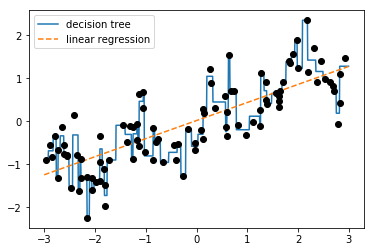

In [11]:
# 4.2 구간 분할, 이산화 그리고 선형 모델, 트리 모델
# 데이터를 표현하기 위해선, 데이터가 가진 의미 뿐 아니라 어떤 모델을 사용하는지에 따라 다름
# 선형 모델, 트리 모델 즉. 어떤 모델을 쓰냐에 따라 데이터의 표현이 달라짐 (wave 데이터)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label='linear regression')

plt.plot(X[:, 0], y, 'o', c='K')
plt.legend(loc='best')

# 아래 그림은 입력 특성이 하나이며,(wave) 선형 모델은 간단하지만, 트리 모델은 훨씬 복잡함
# 한 특성을 여러 특성으로 나누는것을 구간 분할 (연속형 데이터에 강력한 선형 모델을 만드는 방법)

In [16]:
bins = np.linspace(-3, 3, 11)
print('구간:{}'.format(bins))

which_bin = np.digitize(X, bins=bins)
print('데이터 포인트\n', X[:5])
print('데이터 포인트의 소속 구간\n', which_bin[:5])
# 이를 통해, wave 데이터 셋에 있는 연속형 특성을 각 데이터 포인트가 어느 구간에 속했는지 인코딩한 범주형 특성으로 변환했음

구간:[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]
데이터 포인트
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
데이터 포인트의 소속 구간
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


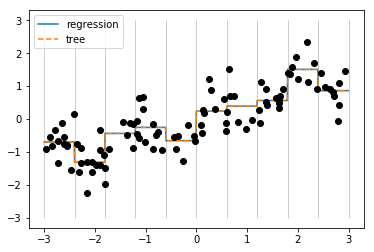

In [20]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='tree')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
# 선형모델은 각 구간에서 다른 값을 가지고 있으므로, 훨씬 유연해짐
# 하지만, 트리는 기존보다 덜 유연해짐. 즉, 데이터를 자유롭게 나눠 학습할 수 있기때문에 특성의 값을 구간으로 나누는 것은 큰 이득이 없음

(100, 11)


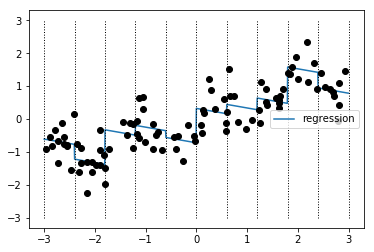

In [21]:
# 3. 상호작용과 다항식
# 특성을 풍부하게 나타내는 다른 방법은 원본 데이터에 상호작용, 다항식을 추가하는 것
# 이는, 선형 모델이 절편뿐만 아니라 기울기도 학습할 수 있음
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='regression')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc='best')
plt.plot(X[:, 0], y, 'o', c='k')

(100, 20)


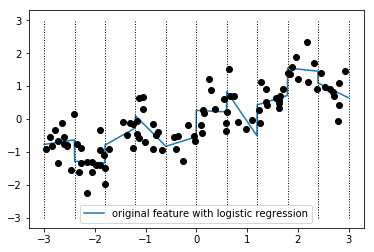

In [22]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='original feature with logistic regression')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.plot(X[:,0], y, 'o', c='k')
plt.legend(loc='best')
# 해당 모델은 앞선 그림과 달리 절편과 기울기가 모두 다름

In [29]:
# 상호작용과 다항식을 위한 더 현실적은 application은 보스턴 주택 가격 데이터셋을 이용함
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ploy = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_ploy = ploy.transform(X_train_scaled)
X_test_ploy = ploy.transform(X_test_scaled)
print('X_train.shape{}'.format(X_train.shape))
print('X_train_ploy.shape{}'.format(X_train_ploy.shape))

print('다항 특성 이름\n{}'.format(ploy.get_feature_names()))

X_train.shape(379, 13)
X_train_ploy.shape(379, 105)
다항 특성 이름
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print('상호 작용이 없을때 점수{}'.format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_ploy, y_train)
print('상호 작용이 있을때 점수{}'.format(ridge.score(X_test_ploy, y_test)))

상호 작용이 없을때 점수0.6213701408454403
상호 작용이 있을때 점수0.7534233848054696


In [33]:
from sklearn.ensemble import RandomForestRegressor
ridge = RandomForestRegressor().fit(X_train_scaled, y_train)
print('상호 작용이 없을때 점수{}'.format(ridge.score(X_test_scaled, y_test)))
ridge = RandomForestRegressor().fit(X_train_ploy, y_train)
print('상호 작용이 있을때 점수{}'.format(ridge.score(X_test_ploy, y_test)))
# Ridge 모델은 상호 작용이 있을 때, 더 좋은 성능을 나타내지만, RandomForest는 특성을 추가하지 않는 것이 성능이 더 좋음
# 이 외에도 log, exp, sin 같은 수학 함수를 적용하는 것도 특성 변환에 유용함

상호 작용이 없을때 점수0.7926454256994232
상호 작용이 있을때 점수0.7268571638500587


X_train.shape(284, 80)
X_train_selected.shape(284, 40)
전체 특성을 사용한 점수0.9298245614035088
선택된 일부 특성을 사용한 점수0.9403508771929825


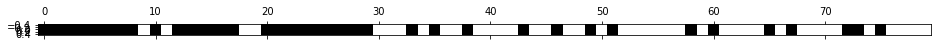

In [41]:
# 특성 자동 선택
# 고차원 데이터셋을 사용할 때, 가장 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋음
# 모델이 간단해지면서, 일반화 성능이 올라갈 것
# 일변량 통계, 모델 기반 선택, 반복적 선택이 있음

# 일변량 통계
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
print('X_train.shape{}'.format(X_train.shape))
print('X_train_selected.shape{}'.format(X_train_selected.shape))

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('전체 특성을 사용한 점수{}'.format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print('선택된 일부 특성을 사용한 점수{}'.format(lr.score(X_test_selected, y_test)))

X_train.shape(284, 80)
X_train_l1.shape(284, 40)
선택된 일부 특성을 사용한 점수0.9508771929824561


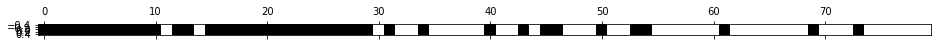

In [43]:
# 모델 기반 특선 선택
# 랜덤포레스트 모델을 통해 만듦, 이는 매우 복잡함 모델이며, 일변량 분석보다 훨씬 강력한 방법임
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape{}'.format(X_train.shape))
print('X_train_l1.shape{}'.format(X_train_l1.shape))

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

X_test_l1= select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_l1, y_train)
print('선택된 일부 특성을 사용한 점수{}'.format(lr.score(X_test_l1, y_test)))

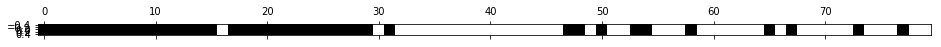

In [45]:
# 반복적 특성 선택
# 이 방법은 앞선 방법과 달리 일련의 모델이 만들어지기 때문에 계산 비용이 훨씬 많이 듦
# 모든 특성으로 시작해서 모델을 만들고 특성 중요도가 가장 낮은 특성을 제거함. 그런다음 제거한 특성을 빼고 나머지 특성 전체로 새로운 모델을 만듦
# 이런식으로 미리 정의한 특성 개수가 남을 때까지 계속함
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [47]:
X_train_ref= select.transform(X_train)
X_test_ref= select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_ref, y_train)
print('선택된 일부 특성을 사용한 점수{}'.format(lr.score(X_test_ref, y_test)))

# 입력 값이 어떤 값이냐에 따라, LogisticRegression모델이 randomForest 모델과 견줄만한 성능을 보임
# 특성 선택이 제대로 되는 것이 중요하며, 어떤 입력값을 넣을지 확신이 안선다면 특성 자동 선택이 도움이 될 것
# 또한, 예측 속도를 높이거나 해석하기 쉬운 모델을 만드는데 필요한 만큼 특성의 수를 줄이는 데도 효과적임.

# 종종 분야 전문가가 선택한 특성이 유용할 수 있음

선택된 일부 특성을 사용한 점수0.9508771929824561
